<a href="https://colab.research.google.com/github/stutikhandelwal02/Credit_Score_Classification/blob/main/Credit_Score_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import modules
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [330]:
dataset = pd.read_csv('/content/Credit_Score_Classification.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [285]:
dataset.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [ ]:
dataset.shape

(100000, 28)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [286]:
#Checking null values in dataset
dataset.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [287]:
# Checking for duplicate values in dataset
dataset.duplicated().sum()

0

In [288]:
df_columns = dataset.describe(include='O').columns

In [289]:
# analysing all the columns
for col in df_columns:
    print('Column Name : '+ col)
    print(dataset[col].value_counts(dropna=False))
    print('\n\n\n')

Column Name : ID
0x1602     1
0x19c88    1
0x19caa    1
0x19ca5    1
0x19ca4    1
          ..
0xd94d     1
0xd94c     1
0xd94b     1
0xd94a     1
0x25fed    1
Name: ID, Length: 100000, dtype: int64




Column Name : Customer_ID
CUS_0xd40     8
CUS_0x9bf4    8
CUS_0x5ae3    8
CUS_0xbe9a    8
CUS_0x4874    8
             ..
CUS_0x2eb4    8
CUS_0x7863    8
CUS_0x9d89    8
CUS_0xc045    8
CUS_0x942c    8
Name: Customer_ID, Length: 12500, dtype: int64




Column Name : Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: Month, dtype: int64




Column Name : Name
NaN               9985
Stevex              44
Langep              44
Jessicad            39
Vaughanl            39
                  ... 
Robin Pomeroyz       4
Matt Scuffhamk       4
Julieno              4
Bavierq              4
Timothyl             3
Name: Name, Length: 10140, dtype: int64




Column Name : Age
38      2833
28 

In [331]:
# Replacing all values with null
dataset = dataset.applymap(lambda x: x if x is np.NaN or not isinstance(x, str) else str(x).strip('_ ,"')).replace(['', 'nan', '!@9#%8', '#F%$D@*&8'], np.NaN)


In [332]:
# Replacing invalid age values with null
age_list=[abs(int(i)) for i in dataset.Age.tolist()]
new_age=[i if i<=150 else np.NaN for i in age_list]
dataset['Age'] = new_age
dataset.Age

0        23.0
1        23.0
2         NaN
3        23.0
4        23.0
         ... 
99995    25.0
99996    25.0
99997    25.0
99998    25.0
99999    25.0
Name: Age, Length: 100000, dtype: float64

In [333]:
#handling datatypes
dataset['ID'] = dataset.ID.apply(lambda x: int(x, 16))

dataset['Annual_Income'] = dataset.Annual_Income.astype(float)

dataset['Num_of_Loan'] = dataset.Num_of_Loan.astype(int) 

dataset['Num_of_Delayed_Payment'] = dataset.Num_of_Delayed_Payment.astype(float)

dataset['Changed_Credit_Limit'] = dataset.Changed_Credit_Limit.astype(float)

dataset['Outstanding_Debt'] = dataset.Outstanding_Debt.astype(float)

dataset['Amount_invested_monthly'] = dataset.Amount_invested_monthly.astype(float)

dataset['Monthly_Balance'] = dataset.Monthly_Balance.astype(float)

Text(0.5, 1.0, 'Target feature distribution of data')

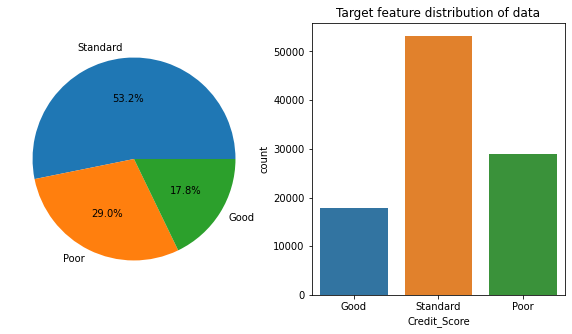

In [334]:
#Target Feature Description
plt.figure(figsize=(10,5))

#pie chart
plt.subplot(1,2,1)
label = dataset.Credit_Score.value_counts().index
label_count = dataset.Credit_Score.value_counts().values
plt.pie(data=dataset, x=label_count, labels=label, autopct='%1.1f%%', radius=1)

#count plot
plt.subplot(1,2,2)
sns.countplot(x='Credit_Score', data=dataset)
plt.title('Target feature distribution of data')

In [300]:
good=dataset[dataset['Credit_Score'] =='Good']
poor=dataset[dataset['Credit_Score'] =='Poor']
std=dataset[dataset['Credit_Score'] =='Standard']

In [301]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       97236 non-null   float64
 5   SSN                       94428 non-null   object 
 6   Occupation                92938 non-null   object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  int64  
 13  Type_of_Loan              88592 non-null   ob

Analysis of Each feature

1. Month

In [302]:
dataset['Month'].value_counts()

January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: Month, dtype: int64

In [303]:
print(good.Month.value_counts())
print('**'*20)
print(poor.Month.value_counts())
print('**'*20)
print(std.Month.value_counts())

August      2413
July        2411
June        2362
April       2357
May         2310
February    2016
March       1984
January     1975
Name: Month, dtype: int64
****************************************
June        3728
May         3712
April       3670
July        3614
August      3602
January     3582
March       3551
February    3539
Name: Month, dtype: int64
****************************************
March       6965
February    6945
January     6943
August      6485
May         6478
July        6475
April       6473
June        6410
Name: Month, dtype: int64


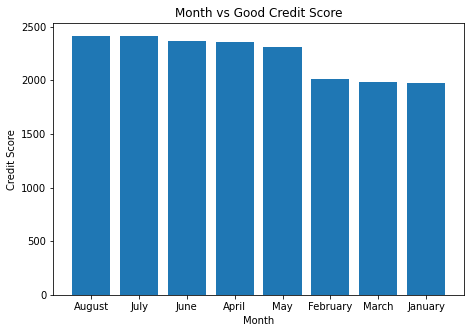

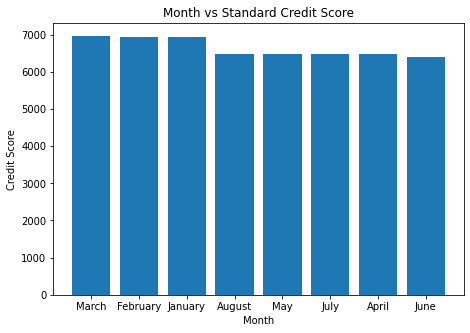

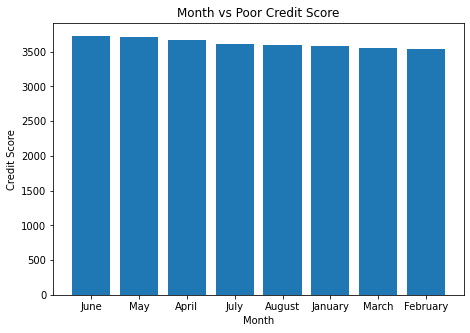

In [309]:
#Month vs Credit Score analysis
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
plt.bar(good.Month.value_counts().index,good.Month.value_counts().values)
plt.title('Month vs Good Credit Score')
plt.xlabel('Month')
plt.ylabel('Credit Score')
plt.show()

plt.figure(figsize=(25,5))
plt.subplot(1,3,2)
plt.bar(std.Month.value_counts().index,std.Month.value_counts().values)
plt.title('Month vs Standard Credit Score')
plt.xlabel('Month')
plt.ylabel('Credit Score')
plt.show()

plt.figure(figsize=(25,5))
plt.subplot(1,3,3)
plt.bar(poor.Month.value_counts().index,poor.Month.value_counts().values)
plt.title('Month vs Poor Credit Score')
plt.xlabel('Month')
plt.ylabel('Credit Score')
plt.show()

By the above graph we can conclude that month does not affect dependent variable much so it can be removed for further process

2. Age

In [83]:
dataset['Age'].value_counts()

38.0     2994
28.0     2968
31.0     2955
26.0     2945
32.0     2884
36.0     2868
35.0     2866
25.0     2861
27.0     2859
39.0     2846
34.0     2837
44.0     2824
19.0     2793
22.0     2785
41.0     2785
20.0     2744
37.0     2742
29.0     2735
43.0     2734
30.0     2727
21.0     2716
24.0     2714
23.0     2654
45.0     2642
40.0     2609
42.0     2577
33.0     2543
18.0     2385
46.0     1621
15.0     1574
17.0     1502
16.0     1455
48.0     1385
49.0     1375
55.0     1366
52.0     1356
53.0     1354
54.0     1311
51.0     1291
50.0     1273
47.0     1227
14.0     1175
56.0      362
95.0        3
99.0        1
115.0       1
109.0       1
111.0       1
102.0       1
100.0       1
123.0       1
142.0       1
118.0       1
124.0       1
126.0       1
134.0       1
112.0       1
146.0       1
Name: Age, dtype: int64

In [98]:
print('Good : ',good['Age'].median())
print("*"*10)
print('Standard : ',std['Age'].median())
print("*"*10)
print('Poor : ',poor['Age'].median())

Good :  36.0
**********
Standard :  33.0
**********
Poor :  31.0


Here variation in median shows that Age affects Target.

(array([4245., 8660., 8580., 5752.,  968.]),
 array([10, 20, 30, 40, 50, 60]),
 <a list of 5 Patch objects>)

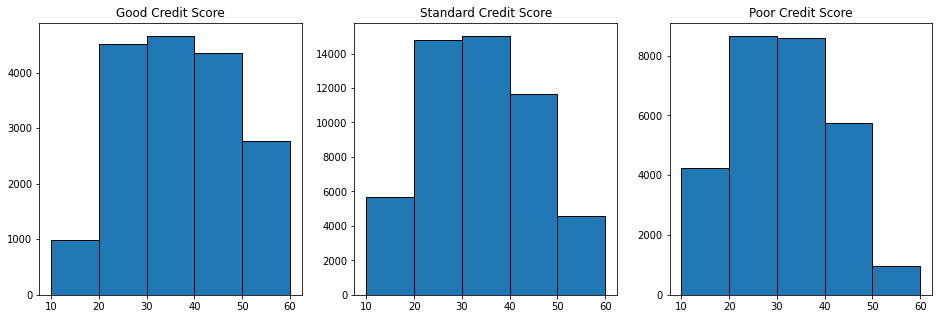

In [310]:
bin = [i for i in range(10,70,10)]
#Histogram of age with good credit score
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
plt.title('Good Credit Score')
plt.hist(good.Age , bins = bin,edgecolor ='black') 
plt.subplot(1,3,2)
plt.title('Standard Credit Score')
plt.hist(std.Age , bins = bin,edgecolor ='black')
plt.subplot(1,3,3)
plt.title('Poor Credit Score')
plt.hist(poor.Age , bins = bin,edgecolor ='black')

As above figure shows old people have greater chance of having good credit score and more youngsters have medium or poor credit score, so age directly affects credit score

3. Occupation

In [311]:
dataset.Occupation.value_counts()

Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64

In [312]:
print(good.Occupation.value_counts())
print('*'*40)
print(poor.Occupation.value_counts())
print('*'*40)
print(std.Occupation.value_counts())

Engineer         1182
Journalist       1173
Lawyer           1162
Media_Manager    1161
Architect        1144
Teacher          1143
Developer        1134
Accountant       1128
Scientist        1127
Musician         1110
Manager          1098
Doctor           1082
Entrepreneur     1080
Mechanic         1024
Writer            837
Name: Occupation, dtype: int64
****************************************
Engineer         1932
Scientist        1921
Entrepreneur     1896
Mechanic         1896
Teacher          1895
Accountant       1879
Lawyer           1810
Developer        1792
Writer           1779
Architect        1734
Manager          1732
Journalist       1725
Musician         1670
Doctor           1661
Media_Manager    1645
Name: Occupation, dtype: int64
****************************************
Lawyer           3603
Architect        3477
Media_Manager    3426
Mechanic         3371
Doctor           3344
Developer        3309
Writer           3269
Accountant       3264
Scientist        325

Text(0.5, 1.0, 'Occupation Having Poor Credit Score')

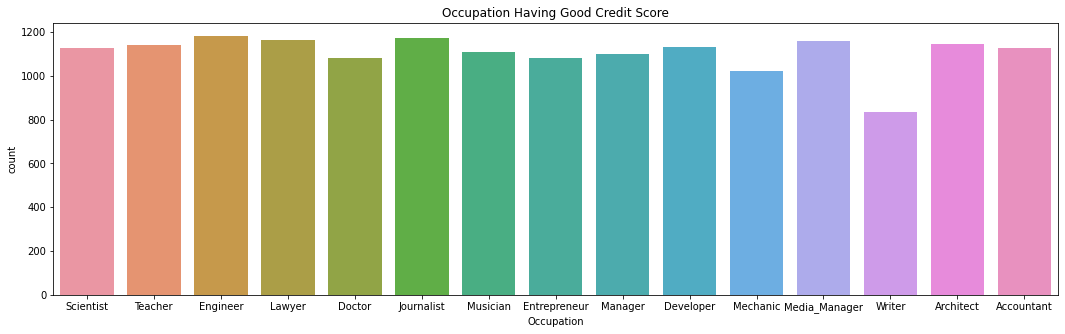

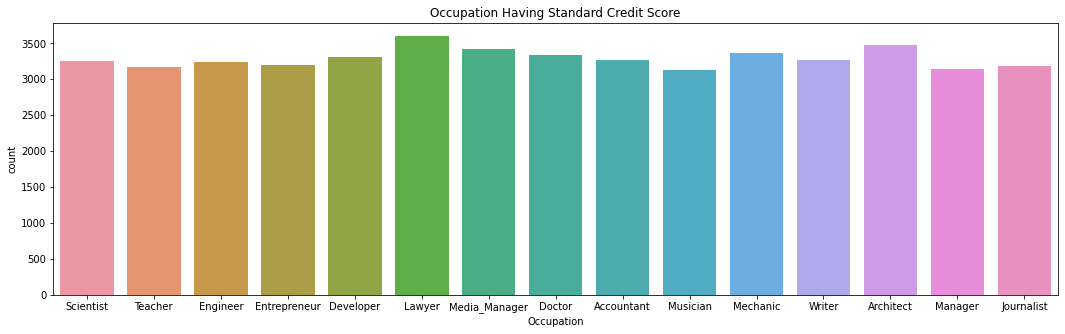

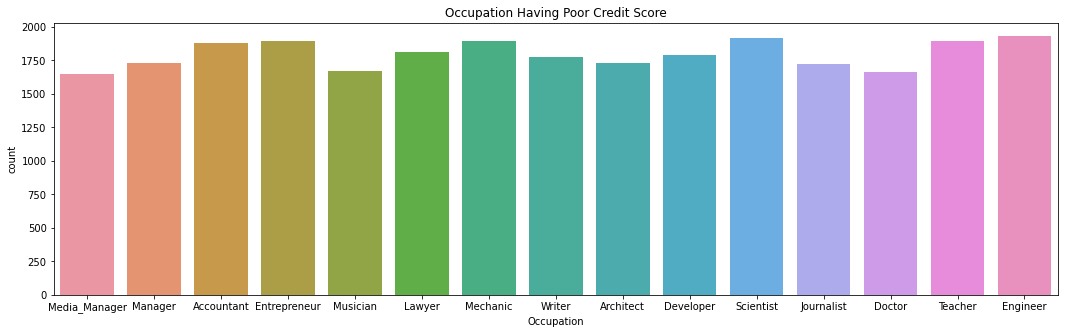

In [313]:
#count plot of Occupation having good credit score
plt.figure(figsize=(18,5))
sns.countplot(x='Occupation', data=good)
plt.title('Occupation Having Good Credit Score')

#count plot of Occupation having Standard credit score
plt.figure(figsize=(18,5))
sns.countplot(x='Occupation', data=std)
plt.title('Occupation Having Standard Credit Score')

#count plot of Occupation having Poor credit score
plt.figure(figsize=(18,5))
sns.countplot(x='Occupation', data=poor)
plt.title('Occupation Having Poor Credit Score')

4. Annual Income

In [316]:
print('Good : ',good['Annual_Income'].median())
print("*"*10)
print('Standard : ',std['Annual_Income'].median())
print("*"*10)
print('Poor : ',poor['Annual_Income'].median())

Good :  45536.43
**********
Standard :  37201.06
**********
Poor :  32276.42


In [315]:
print('Good : ',good['Annual_Income'].mean())
print("*"*10)
print('Standard : ',std['Annual_Income'].mean())
print("*"*10)
print('Poor : ',poor['Annual_Income'].mean())

Good :  184936.58981013016
**********
Standard :  185249.1564578553
**********
Poor :  154979.03169839297


(array([271., 293., 379., 216., 170., 118.,  76., 125.,   0.]),
 array([100000, 110000, 120000, 130000, 140000, 150000, 160000, 170000,
        180000, 190000]),
 <a list of 9 Patch objects>)

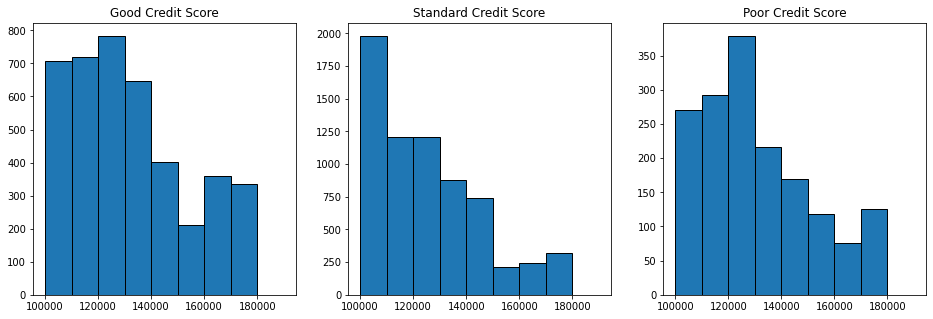

In [314]:
bin = [i for i in range(100000,200000,10000)]
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
plt.title('Good Credit Score')
plt.hist(good.Annual_Income , bins = bin,edgecolor ='black') 
plt.subplot(1,3,2)
plt.title('Standard Credit Score')
plt.hist(std.Annual_Income , bins = bin,edgecolor ='black')
plt.subplot(1,3,3)
plt.title('Poor Credit Score')
plt.hist(poor.Annual_Income , bins = bin,edgecolor ='black')


Here it can be concluded that one having high Annual Income will have more chances of having Good credit score so, Annual Income directly affects credit score

5. Monthly Inhand Salary

In [317]:
print('Good : ',good['Monthly_Inhand_Salary'].median())
print("*"*10)
print('Standard : ',std['Monthly_Inhand_Salary'].median())
print("*"*10)
print('Poor : ',poor['Monthly_Inhand_Salary'].median())

Good :  3820.019166666667
**********
Standard :  3101.080413995829
**********
Poor :  2671.431666666667


In [318]:
print('Good : ',good['Monthly_Inhand_Salary'].mean())
print("*"*10)
print('Standard : ',std['Monthly_Inhand_Salary'].mean())
print("*"*10)
print('Poor : ',poor['Monthly_Inhand_Salary'].mean())

Good :  5389.246647164293
**********
Standard :  4242.0370512062
**********
Poor :  3375.311674185473


(array([12780.,  7091.,  3117.,   862.,   532.,   259.]),
 array([  319.55625   ,  2794.16020833,  5268.76416667,  7743.368125  ,
        10217.97208333, 12692.57604167, 15167.18      ]),
 <a list of 6 Patch objects>)

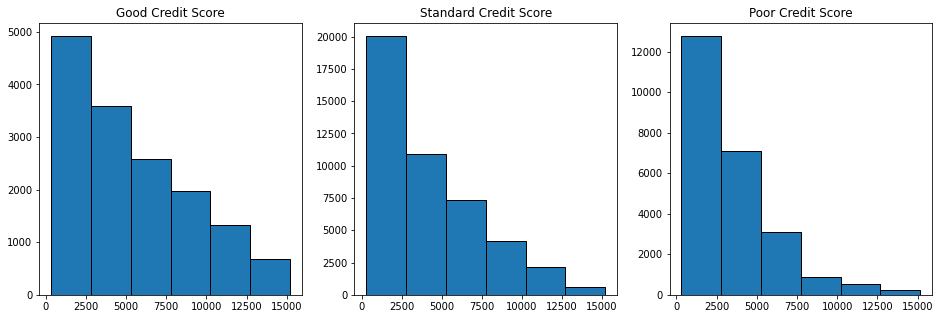

In [160]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
plt.title('Good Credit Score')
plt.hist(good.Monthly_Inhand_Salary , bins = 6,edgecolor ='black') 
plt.subplot(1,3,2)
plt.title('Standard Credit Score')
plt.hist(std.Monthly_Inhand_Salary , bins = 6,edgecolor ='black')
plt.subplot(1,3,3)
plt.title('Poor Credit Score')
plt.hist(poor.Monthly_Inhand_Salary , bins = 6,edgecolor ='black')

It can be concluded that one having high Monthly Inhand Salary will have more chances of having Good credit score 

6. Number of Bank Accounts 

In [319]:
print('Good : ',good['Num_Bank_Accounts'].median())
print("*"*10)
print('Standard : ',std['Num_Bank_Accounts'].median())
print("*"*10)
print('Poor : ',poor['Num_Bank_Accounts'].median())

Good :  3.0
**********
Standard :  5.0
**********
Poor :  7.0


In [320]:
print('Good : ',good['Num_Bank_Accounts'].mean())
print("*"*10)
print('Standard : ',std['Num_Bank_Accounts'].mean())
print("*"*10)
print('Poor : ',poor['Num_Bank_Accounts'].mean())

Good :  15.083632488220776
**********
Standard :  16.873754090344907
**********
Poor :  18.72446375612111


(array([28665.,    67.,    81.,    55.,    58.,    72.]),
 array([-1.000e+00,  2.980e+02,  5.970e+02,  8.960e+02,  1.195e+03,
         1.494e+03,  1.793e+03]),
 <a list of 6 Patch objects>)

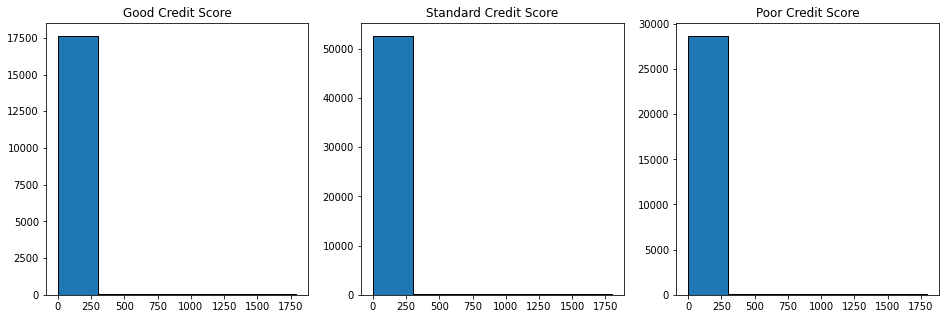

In [321]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
plt.title('Good Credit Score')
plt.hist(good.Num_Bank_Accounts , bins = 6,edgecolor ='black') 
plt.subplot(1,3,2)
plt.title('Standard Credit Score')
plt.hist(std.Num_Bank_Accounts , bins = 6,edgecolor ='black')
plt.subplot(1,3,3)
plt.title('Poor Credit Score')
plt.hist(poor.Num_Bank_Accounts , bins = 6,edgecolor ='black')

It can be concluded that one having less number of bank accounts will have more chances of having Good credit score.

7. Number of Credit Card

In [322]:
print('Good : ',good['Num_Credit_Card'].median())
print("*"*10)
print('Standard : ',std['Num_Credit_Card'].median())
print("*"*10)
print('Poor : ',poor['Num_Credit_Card'].median())

Good :  4.0
**********
Standard :  5.0
**********
Poor :  7.0


In [323]:
print('Good : ',good['Num_Credit_Card'].mean())
print("*"*10)
print('Standard : ',std['Num_Credit_Card'].mean())
print("*"*10)
print('Poor : ',poor['Num_Credit_Card'].mean())

Good :  21.19985416199237
**********
Standard :  22.079926279760784
**********
Poor :  23.981446996344577


(array([28452.,   100.,    97.,   103.,   134.,   112.]),
 array([1.00000000e+00, 2.50666667e+02, 5.00333333e+02, 7.50000000e+02,
        9.99666667e+02, 1.24933333e+03, 1.49900000e+03]),
 <a list of 6 Patch objects>)

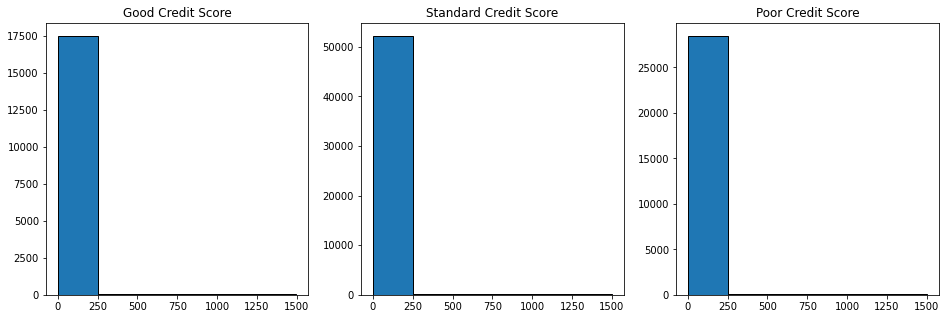

In [158]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
plt.title('Good Credit Score')
plt.hist(good.Num_Credit_Card , bins = 6,edgecolor ='black') 
plt.subplot(1,3,2)
plt.title('Standard Credit Score')
plt.hist(std.Num_Credit_Card , bins = 6,edgecolor ='black')
plt.subplot(1,3,3)
plt.title('Poor Credit Score')
plt.hist(poor.Num_Credit_Card , bins = 6,edgecolor ='black')

It can be concluded that one having less number of credit cards will have more chances of having Good credit score.

8. Interest Rate

In [149]:
print('Good : ',good.Interest_Rate.median())
print("*"*10)
print('Standard : ',std.Interest_Rate.median())
print("*"*10)
print('Poor : ',poor.Interest_Rate.median())

Good :  7.0
**********
Standard :  13.0
**********
Poor :  21.0


In [150]:
print('Good : ',good.Interest_Rate.mean())
print("*"*10)
print('Standard : ',std.Interest_Rate.mean())
print("*"*10)
print('Poor : ',poor.Interest_Rate.mean())

Good :  73.95871662553287
**********
Standard :  69.93105653138753
**********
Poor :  76.1967721911856


(array([28506.,   112.,   105.,   101.,    90.,    84.]),
 array([1.00000000e+00, 9.63166667e+02, 1.92533333e+03, 2.88750000e+03,
        3.84966667e+03, 4.81183333e+03, 5.77400000e+03]),
 <a list of 6 Patch objects>)

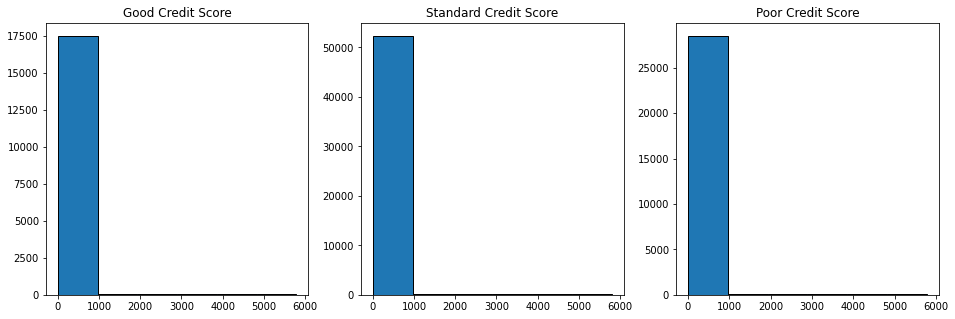

In [157]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
plt.title('Good Credit Score')
plt.hist(good.Interest_Rate , bins = 6,edgecolor ='black') 
plt.subplot(1,3,2)
plt.title('Standard Credit Score')
plt.hist(std.Interest_Rate , bins = 6,edgecolor ='black')
plt.subplot(1,3,3)
plt.title('Poor Credit Score')
plt.hist(poor.Interest_Rate , bins = 6,edgecolor ='black')

It can be concluded that one having less Interest Rate will have more chances of having Good credit score.

9.Number of Loans

In [167]:
print('Good : ',good.Num_of_Loan.median())
print("*"*10)
print('Standard : ',std.Num_of_Loan.median())
print("*"*10)
print('Poor : ',poor.Num_of_Loan.median())

Good :  2.0
**********
Standard :  3.0
**********
Poor :  5.0


In [166]:
print('Good : ',good.Num_of_Loan.mean())
print("*"*10)
print('Standard : ',std.Num_of_Loan.mean())
print("*"*10)
print('Poor : ',poor.Num_of_Loan.mean())

Good :  1.7926295714606237
**********
Standard :  2.958081017038402
**********
Poor :  3.8535071384233395


(array([2.7798e+04, 9.0000e+00, 1.0000e+01, 5.0000e+00, 6.0000e+00]),
 array([  0, 100, 200, 300, 400, 500]),
 <a list of 5 Patch objects>)

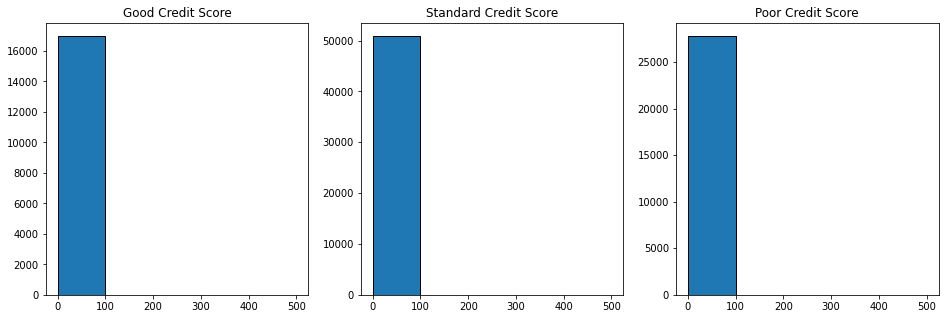

In [165]:
plt.figure(figsize=(16,5))
bin = [i for i in range(0,501,100)]
plt.subplot(1,3,1)
plt.title('Good Credit Score')
plt.hist(good.Num_of_Loan , bins = bin,edgecolor ='black') 
plt.subplot(1,3,2)
plt.title('Standard Credit Score')
plt.hist(std.Num_of_Loan , bins = bin,edgecolor ='black')
plt.subplot(1,3,3)
plt.title('Poor Credit Score')
plt.hist(poor.Num_of_Loan , bins = bin,edgecolor ='black')

It can be concluded that one having less Number of Loans will have more chances of having Good credit score.

10. Type of Loan

In [168]:
dataset.Type_of_Loan.value_counts()

Not Specified                                                                                                                         1408
Credit-Builder Loan                                                                                                                   1280
Personal Loan                                                                                                                         1272
Debt Consolidation Loan                                                                                                               1264
Student Loan                                                                                                                          1240
                                                                                                                                      ... 
Not Specified, Mortgage Loan, Auto Loan, and Payday Loan                                                                                 8
Payday Loan, Mortgage Loan,



11. Delay from due date 

In [170]:
print('Good : ',good.Delay_from_due_date.median())
print("*"*10)
print('Standard : ',std.Delay_from_due_date.median())
print("*"*10)
print('Poor : ',poor.Delay_from_due_date.median())

Good :  10.0
**********
Standard :  18.0
**********
Poor :  27.0


In [171]:
print('Good : ',good.Delay_from_due_date.mean())
print("*"*10)
print('Standard : ',std.Delay_from_due_date.mean())
print("*"*10)
print('Poor : ',poor.Delay_from_due_date.mean())

Good :  10.892752972851694
**********
Standard :  19.749576860871855
**********
Poor :  29.744051313883716


(array([ 489., 3776., 6325., 6684., 3209., 3324., 3297., 1894.]),
 array([-5.,  4., 13., 22., 31., 40., 49., 58., 67.]),
 <a list of 8 Patch objects>)

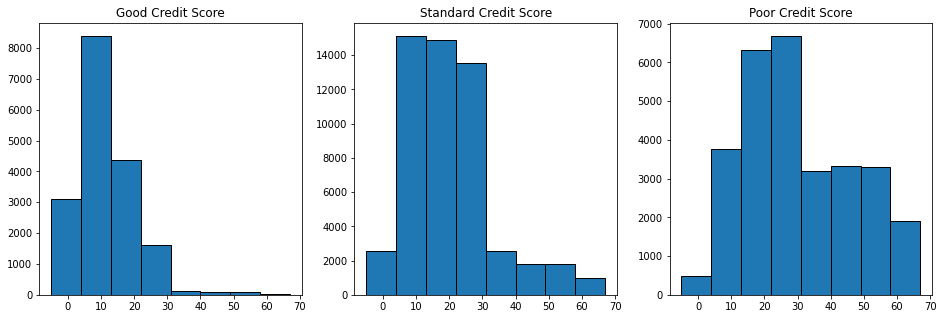

In [175]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
plt.title('Good Credit Score')
plt.hist(good.Delay_from_due_date , bins = 8,edgecolor ='black') 
plt.subplot(1,3,2)
plt.title('Standard Credit Score')
plt.hist(std.Delay_from_due_date , bins = 8,edgecolor ='black')
plt.subplot(1,3,3)
plt.title('Poor Credit Score')
plt.hist(poor.Delay_from_due_date, bins = 8,edgecolor ='black')

It can be concluded that one having less Delay will have more chances of having Good credit score.

12. Number of Delayed Payment  

In [176]:
print('Good : ',good.Num_of_Delayed_Payment.median())
print("*"*10)
print('Standard : ',std.Num_of_Delayed_Payment.median())
print("*"*10)
print('Poor : ',poor.Num_of_Delayed_Payment.median())

Good :  8.0
**********
Standard :  14.0
**********
Poor :  17.0


In [177]:
print('Good : ',good.Num_of_Delayed_Payment.mean())
print("*"*10)
print('Standard : ',std.Num_of_Delayed_Payment.mean())
print("*"*10)
print('Poor : ',poor.Num_of_Delayed_Payment.mean())

Good :  25.971647463352838
**********
Standard :  31.917781059701795
**********
Poor :  32.14333876704209


(array([2.6822e+04, 2.0000e+01, 2.2000e+01, 2.4000e+01, 2.7000e+01,
        2.1000e+01, 2.3000e+01, 3.3000e+01]),
 array([-3.000000e+00,  5.398750e+02,  1.082750e+03,  1.625625e+03,
         2.168500e+03,  2.711375e+03,  3.254250e+03,  3.797125e+03,
         4.340000e+03]),
 <a list of 8 Patch objects>)

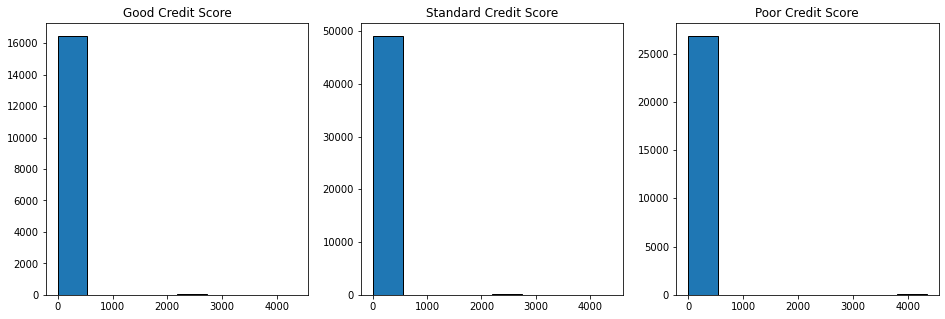

In [178]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
plt.title('Good Credit Score')
plt.hist(good.Num_of_Delayed_Payment , bins = 8,edgecolor ='black') 
plt.subplot(1,3,2)
plt.title('Standard Credit Score')
plt.hist(std.Num_of_Delayed_Payment, bins = 8,edgecolor ='black')
plt.subplot(1,3,3)
plt.title('Poor Credit Score')
plt.hist(poor.Num_of_Delayed_Payment, bins = 8,edgecolor ='black')

It can be concluded that one having less Number of Delayed Payments will have Good credit score.

13. Changed Credit Limit

In [182]:
print('Good : ',good.Changed_Credit_Limit.median())
print("*"*10)
print('Standard : ',std.Changed_Credit_Limit.median())
print("*"*10)
print('Poor : ',poor.Changed_Credit_Limit.median())

Good :  6.7
**********
Standard :  10.3
**********
Poor :  9.73


In [179]:
print('Good : ',good.Changed_Credit_Limit.mean())
print("*"*10)
print('Standard : ',std.Changed_Credit_Limit.mean())
print("*"*10)
print('Poor : ',poor.Changed_Credit_Limit.mean())

Good :  7.105812768393931
**********
Standard :  11.130055296353898
**********
Poor :  11.050011283100032


(array([ 308., 4726., 8507., 6269., 5439., 1809., 1225.,   78.]),
 array([-6.45   , -1.16625,  4.1175 ,  9.40125, 14.685  , 19.96875,
        25.2525 , 30.53625, 35.82   ]),
 <a list of 8 Patch objects>)

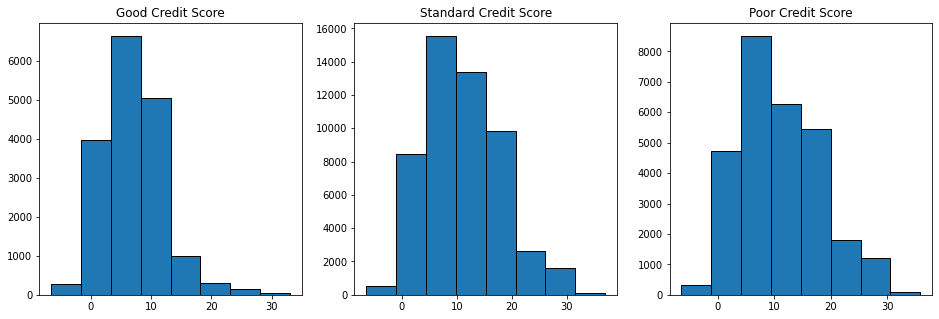

In [181]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
plt.title('Good Credit Score')
plt.hist(good.Changed_Credit_Limit , bins = 8,edgecolor ='black') 
plt.subplot(1,3,2)
plt.title('Standard Credit Score')
plt.hist(std.Changed_Credit_Limit, bins = 8,edgecolor ='black')
plt.subplot(1,3,3)
plt.title('Poor Credit Score')
plt.hist(poor.Changed_Credit_Limit, bins = 8,edgecolor ='black')

14. Number of Credit Inquiries 

In [187]:
print('Good : ',good.Num_Credit_Inquiries.median())
print("*"*10)
print('Standard : ',std.Num_Credit_Inquiries.median())
print("*"*10)
print('Poor : ',poor.Num_Credit_Inquiries.median())

Good :  3.0
**********
Standard :  5.0
**********
Poor :  9.0


In [186]:
print('Good : ',good.Num_Credit_Inquiries.mean())
print("*"*10)
print('Standard : ',std.Num_Credit_Inquiries.mean())
print("*"*10)
print('Poor : ',poor.Num_Credit_Inquiries.mean())

Good :  24.483044547378054
**********
Standard :  27.192684845809907
**********
Poor :  30.7949150754299


(array([28019.,    72.,    93.,    78.,    86.,    89.]),
 array([   0.        ,  428.66666667,  857.33333333, 1286.        ,
        1714.66666667, 2143.33333333, 2572.        ]),
 <a list of 6 Patch objects>)

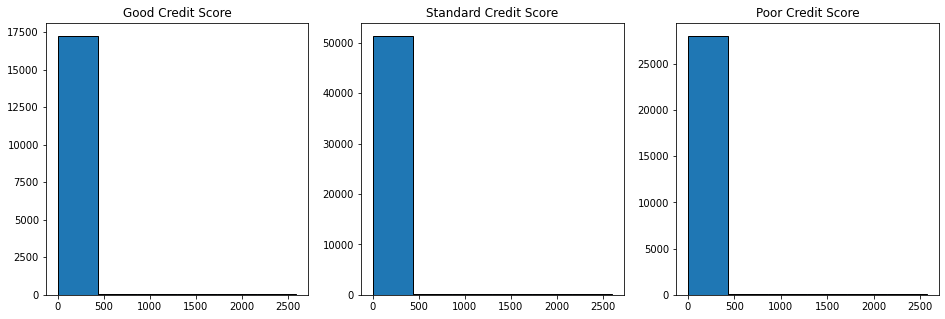

In [189]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
plt.title('Good Credit Score')
plt.hist(good.Num_Credit_Inquiries  , bins = 6,edgecolor ='black') 
plt.subplot(1,3,2)
plt.title('Standard Credit Score')
plt.hist(std.Num_Credit_Inquiries , bins = 6,edgecolor ='black')
plt.subplot(1,3,3)
plt.title('Poor Credit Score')
plt.hist(poor.Num_Credit_Inquiries , bins = 6,edgecolor ='black')

It can be concluded that one having less inquiries will have Good credit score.

15. Credit Mix

In [324]:
dataset.Credit_Mix.unique()

array([nan, 'Good', 'Standard', 'Bad'], dtype=object)

In [191]:
print(good.Credit_Mix.value_counts())
print('*'*40)
print(poor.Credit_Mix.value_counts())
print('*'*40)
print(std.Credit_Mix.value_counts())

Good        11875
Standard     2043
Bad           288
Name: Credit_Mix, dtype: int64
****************************************
Bad         11409
Standard     7859
Good         3861
Name: Credit_Mix, dtype: int64
****************************************
Standard    26577
Good         8601
Bad          7292
Name: Credit_Mix, dtype: int64


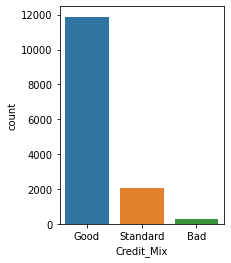

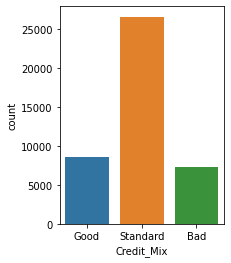

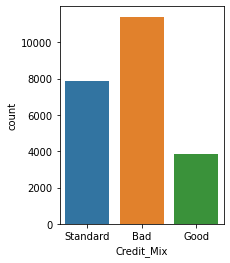

In [204]:
#count plot of Credit_Mix having good credit score
plt.figure(figsize=(10,4))
plt.subplot(1,3,1)
sns.countplot(x='Credit_Mix', data=good)
plt.title('Credit_Mix Having Good Credit Score')

#count plot of Credit_Mix having Standard credit score
plt.figure(figsize=(10,4))
plt.subplot(1,3,2)
sns.countplot(x='Credit_Mix', data=std)
plt.title('Credit_Mix Having Standard Credit Score')

#count plot of Credit_Mix having Poor credit score
plt.figure(figsize=(10,4))
plt.subplot(1,3,3)
sns.countplot(x='Credit_Mix', data=poor)
plt.title('Credit_Mix Having Poor Credit Score')

16. Outstanding Debt or Remaining Debt

In [205]:
print('Good : ',good.Outstanding_Debt.median())
print("*"*10)
print('Standard : ',std.Outstanding_Debt.median())
print("*"*10)
print('Poor : ',poor.Outstanding_Debt.median())

Good :  736.47
**********
Standard :  1001.61
**********
Poor :  1945.35


In [206]:
print('Good : ',good.Outstanding_Debt.mean())
print("*"*10)
print('Standard : ',std.Outstanding_Debt.mean())
print("*"*10)
print('Poor : ',poor.Outstanding_Debt.mean())

Good :  801.2563237603771
**********
Standard :  1278.4195518486479
**********
Poor :  2081.473157114284


(array([3815., 7585., 8876., 4280., 2313., 2129.]),
 array([5.40000e-01, 8.33300e+02, 1.66606e+03, 2.49882e+03, 3.33158e+03,
        4.16434e+03, 4.99710e+03]),
 <a list of 6 Patch objects>)

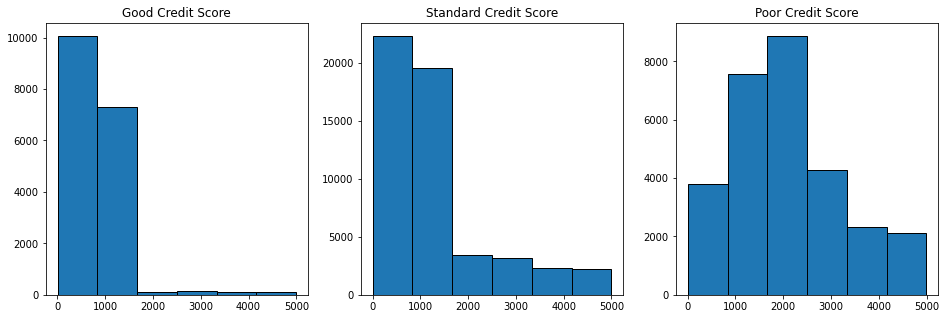

In [207]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
plt.title('Good Credit Score')
plt.hist(good.Outstanding_Debt  , bins = 6,edgecolor ='black') 
plt.subplot(1,3,2)
plt.title('Standard Credit Score')
plt.hist(std.Outstanding_Debt , bins = 6,edgecolor ='black')
plt.subplot(1,3,3)
plt.title('Poor Credit Score')
plt.hist(poor.Outstanding_Debt , bins = 6,edgecolor ='black')

17. Credit Utilization Ratio

In [209]:
print('Good : ',good.Credit_Utilization_Ratio.median())
print("*"*10)
print('Standard : ',std.Credit_Utilization_Ratio.median())
print("*"*10)
print('Poor : ',poor.Credit_Utilization_Ratio.median())

Good :  32.74082560091017
**********
Standard :  32.32676491558878
**********
Poor :  32.006944801473466


In [211]:
print('Good : ',good.Credit_Utilization_Ratio.mean())
print("*"*10)
print('Standard : ',std.Credit_Utilization_Ratio.mean())
print("*"*10)
print('Poor : ',poor.Credit_Utilization_Ratio.mean())

Good :  32.686107068560574
**********
Standard :  32.31381994763405
**********
Poor :  31.98614639563311


(array([2572., 7804., 8110., 8113., 2345.,   54.]),
 array([20.1729419 , 24.89242687, 29.61191184, 34.33139681, 39.05088178,
        43.77036676, 48.48985173]),
 <a list of 6 Patch objects>)

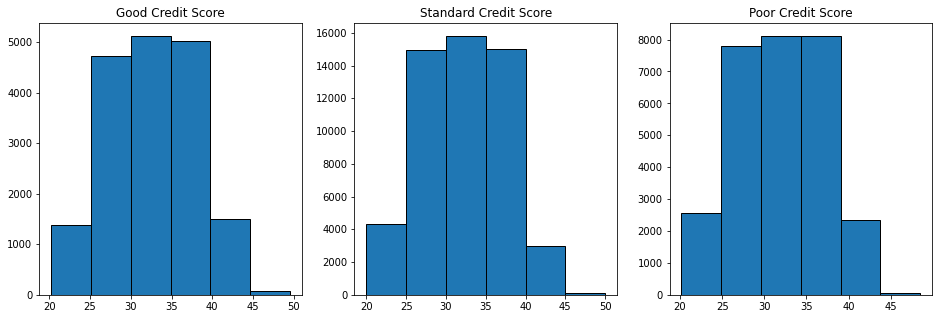

In [212]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
plt.title('Good Credit Score')
plt.hist(good.Credit_Utilization_Ratio , bins = 6,edgecolor ='black') 
plt.subplot(1,3,2)
plt.title('Standard Credit Score')
plt.hist(std.Credit_Utilization_Ratio , bins = 6,edgecolor ='black')
plt.subplot(1,3,3)
plt.title('Poor Credit Score')
plt.hist(poor.Credit_Utilization_Ratio , bins = 6,edgecolor ='black')

From the above figure it can be concluded that Credit Utilization Ratio doen't affect credit score.

18. Payment of Minimum Amount

In [219]:
dataset.Payment_of_Min_Amount.unique()

array(['No', 'NM', 'Yes'], dtype=object)

In [218]:
dataset.Payment_of_Min_Amount.value_counts()

Yes    52326
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64

Text(0.5, 1.0, 'Target feature distribution of data')

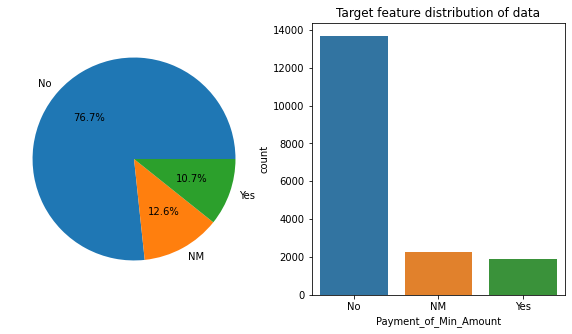

In [236]:
plt.figure(figsize=(10,5))

#pie chart for Good credit score
plt.subplot(1,2,1)
label = good.Payment_of_Min_Amount.value_counts().index
label_count = good.Payment_of_Min_Amount.value_counts().values
plt.pie(data=good, x=label_count, labels=label, autopct='%1.1f%%', radius=1)

#count plot
plt.subplot(1,2,2)
sns.countplot(x='Payment_of_Min_Amount', data=good)
plt.title('Target feature distribution of data')


Text(0.5, 1.0, 'Target feature distribution of data')

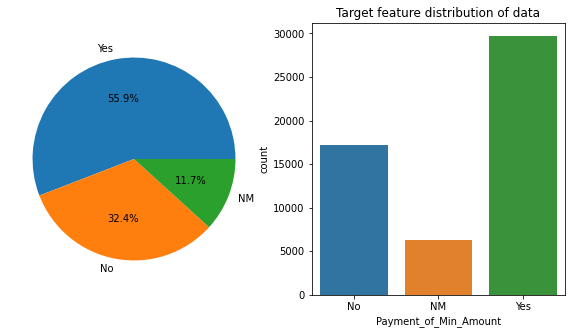

In [238]:
plt.figure(figsize=(10,5))

#pie chart for standard credit score
plt.subplot(1,2,1)
label = std.Payment_of_Min_Amount.value_counts().index
label_count = std.Payment_of_Min_Amount.value_counts().values
plt.pie(data=std, x=label_count, labels=label, autopct='%1.1f%%', radius=1)

#count plot
plt.subplot(1,2,2)
sns.countplot(x='Payment_of_Min_Amount', data=std)
plt.title('Target feature distribution of data')


Text(0.5, 1.0, 'Target feature distribution of data')

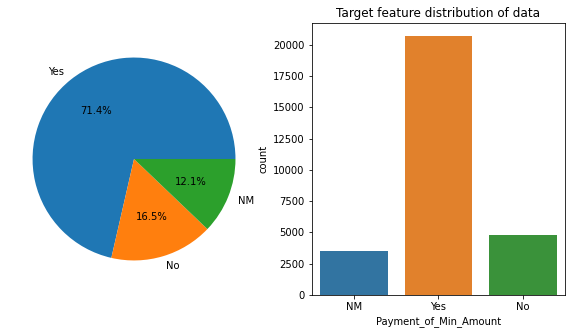

In [239]:
plt.figure(figsize=(10,5))

#pie chart for poor credit score
plt.subplot(1,2,1)
label = poor.Payment_of_Min_Amount.value_counts().index
label_count = poor.Payment_of_Min_Amount.value_counts().values
plt.pie(data=poor, x=label_count, labels=label, autopct='%1.1f%%', radius=1)

#count plot
plt.subplot(1,2,2)
sns.countplot(x='Payment_of_Min_Amount', data=poor)
plt.title('Target feature distribution of data')

From the above figures it can be concluded that Payment of minimum amount doen't affect credit score.

19. Total EMI per month

In [241]:
print('Good : ',good.Total_EMI_per_month.median())
print("*"*10)
print('Standard : ',std.Total_EMI_per_month.median())
print("*"*10)
print('Poor : ',poor.Total_EMI_per_month.median())

Good :  64.8112819096051
**********
Standard :  65.87314109365732
**********
Poor :  77.71339407246742


In [243]:
print('Good : ',good.Total_EMI_per_month.mean())
print("*"*10)
print('Standard : ',std.Total_EMI_per_month.mean())
print("*"*10)
print('Poor : ',poor.Total_EMI_per_month.mean())

Good :  1477.1994938087737
**********
Standard :  1399.6506879404262
**********
Poor :  1363.9314230440807


(array([28268.,   142.,   142.,   155.,   136.,   155.]),
 array([    0.        , 13721.83333333, 27443.66666667, 41165.5       ,
        54887.33333333, 68609.16666667, 82331.        ]),
 <a list of 6 Patch objects>)

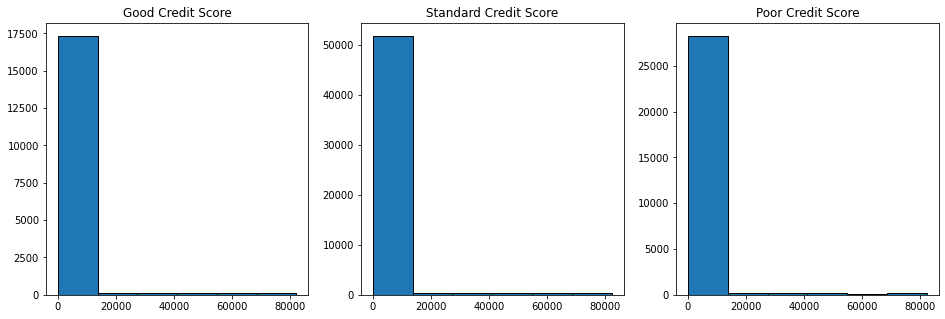

In [244]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
plt.title('Good Credit Score')
plt.hist(good.Total_EMI_per_month , bins = 6,edgecolor ='black') 
plt.subplot(1,3,2)
plt.title('Standard Credit Score')
plt.hist(std.Total_EMI_per_month , bins = 6,edgecolor ='black')
plt.subplot(1,3,3)
plt.title('Poor Credit Score')
plt.hist(poor.Total_EMI_per_month , bins = 6,edgecolor ='black')

From the above figures it can be interpreted that Monthly EMI does not affect credit score.

20. Amount invested monthly

In [246]:
print('Good : ',good.Amount_invested_monthly.median())
print("*"*10)
print('Standard : ',std.Amount_invested_monthly.median())
print("*"*10)
print('Poor : ',poor.Amount_invested_monthly.median())

Good :  167.12859911575654
**********
Standard :  137.2902285020222
**********
Poor :  119.36201781881933


In [247]:
print('Good : ',good.Amount_invested_monthly.mean())
print("*"*10)
print('Standard : ',std.Amount_invested_monthly.mean())
print("*"*10)
print('Poor : ',poor.Amount_invested_monthly.mean())

Good :  691.4372429124851
**********
Standard :  631.400247505731
**********
Poor :  615.2582274099905


(array([2.6381e+04, 5.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.2800e+03]),
 array([    0.        ,  1666.66666667,  3333.33333333,  5000.        ,
         6666.66666667,  8333.33333333, 10000.        ]),
 <a list of 6 Patch objects>)

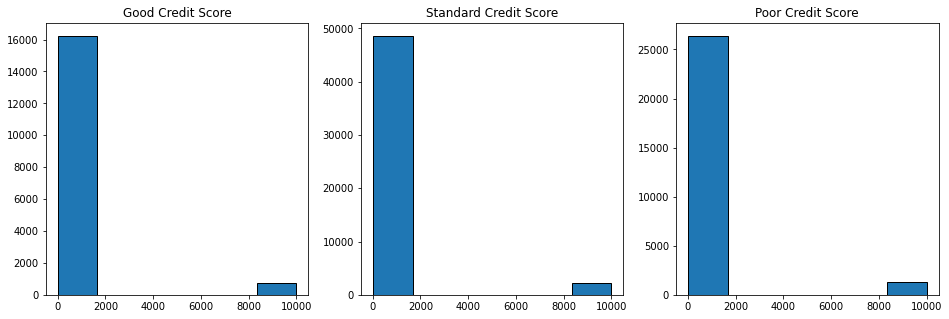

In [249]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
plt.title('Good Credit Score')
plt.hist(good.Amount_invested_monthly , bins = 6,edgecolor ='black') 
plt.subplot(1,3,2)
plt.title('Standard Credit Score')
plt.hist(std.Amount_invested_monthly , bins = 6,edgecolor ='black')
plt.subplot(1,3,3)
plt.title('Poor Credit Score')
plt.hist(poor.Amount_invested_monthly , bins = 6,edgecolor ='black')

From the above figures it can be interpreted that Monthly Amount invested does not affect credit score.

21. Payment Behaviour 

In [251]:
dataset.Payment_Behaviour.unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', nan,
       'High_spent_Large_value_payments'], dtype=object)

In [253]:
print(good.Payment_Behaviour.value_counts())
print('*'*40)
print(poor.Payment_Behaviour.value_counts())
print('*'*40)
print(std.Payment_Behaviour.value_counts())

High_spent_Medium_value_payments    3524
Low_spent_Small_value_payments      3273
High_spent_Large_value_payments     3172
Low_spent_Medium_value_payments     2482
High_spent_Small_value_payments     2114
Low_spent_Large_value_payments      1880
Name: Payment_Behaviour, dtype: int64
****************************************
Low_spent_Small_value_payments      9125
High_spent_Medium_value_payments    4439
Low_spent_Medium_value_payments     4211
High_spent_Small_value_payments     3088
High_spent_Large_value_payments     2979
Low_spent_Large_value_payments      2931
Name: Payment_Behaviour, dtype: int64
****************************************
Low_spent_Small_value_payments      13115
High_spent_Medium_value_payments     9577
High_spent_Large_value_payments      7570
Low_spent_Medium_value_payments      7168
High_spent_Small_value_payments      6138
Low_spent_Large_value_payments       5614
Name: Payment_Behaviour, dtype: int64


([<matplotlib.patches.Wedge at 0x7f2df23004d0>,
 [Text(0.860005283077041, 0.685850503447784, 'High_spent_Medium_value_payments'),
  Text(-0.4292614597884213, 1.0127855642436427, 'Low_spent_Small_value_payments'),
  Text(-1.0979323927711173, -0.06741261680048612, 'High_spent_Large_value_payments'),
  Text(-0.45791211398435255, -1.0001582354139675, 'Low_spent_Medium_value_payments'),
  Text(0.4771232919355841, -0.9911374093901165, 'High_spent_Small_value_payments'),
  Text(1.029816137607866, -0.3866247828611312, 'Low_spent_Large_value_payments')],
 [Text(0.4690937907692951, 0.37410027460788214, '21.4%'),
  Text(-0.23414261443004794, 0.5524284895874414, '19.9%'),
  Text(-0.5988722142387912, -0.036770518254810605, '19.3%'),
  Text(-0.249770243991465, -0.5455408556803459, '15.1%'),
  Text(0.26024906832850037, -0.5406204051218817, '12.9%'),
  Text(0.5617178932406541, -0.21088624519698065, '11.4%')])

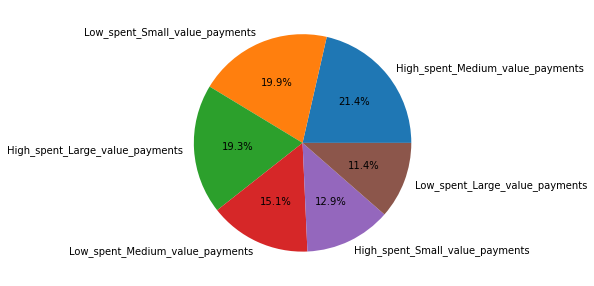

In [266]:
plt.figure(figsize=(16,5))
#pie chart for good credit score
plt.subplot(1,2,1)
label = good.Payment_Behaviour.value_counts().index
label_count = good.Payment_Behaviour.value_counts().values
plt.pie(data=good, x=label_count, labels=label, autopct='%1.1f%%', radius=1)

([<matplotlib.patches.Wedge at 0x7f2df21d7890>,
 [Text(0.7360541166585506, 0.8174498989846418, 'Low_spent_Small_value_payments'),
  Text(-0.7223769997100772, 0.8295610105892558, 'High_spent_Medium_value_payments'),
  Text(-1.0682245856014718, -0.2624809225764112, 'High_spent_Large_value_payments'),
  Text(-0.4166148391410076, -1.0180530810363047, 'Low_spent_Medium_value_payments'),
  Text(0.4898311382208104, -0.9849190098832012, 'High_spent_Small_value_payments'),
  Text(1.0300261444602583, -0.38606494496177096, 'Low_spent_Large_value_payments')],
 [Text(0.4014840636319366, 0.44588176308253186, '26.7%'),
  Text(-0.3940238180236784, 0.4524878239577758, '19.5%'),
  Text(-0.5826679557826209, -0.14317141231440608, '15.4%'),
  Text(-0.22724445771327684, -0.555301680565257, '14.6%'),
  Text(0.26718062084771477, -0.5372285508453825, '12.5%'),
  Text(0.5618324424328681, -0.21058087907005688, '11.4%')])

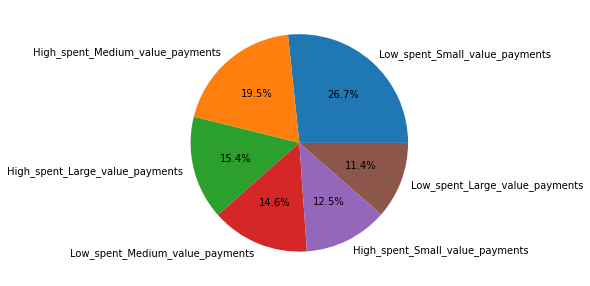

In [269]:
plt.figure(figsize=(16,5))
#pie chart for std credit score
plt.subplot(1,2,1)
label = std.Payment_Behaviour.value_counts().index
label_count = std.Payment_Behaviour.value_counts().values
plt.pie(data=std, x=label_count, labels=label, autopct='%1.1f%%', radius=1)


([<matplotlib.patches.Wedge at 0x7f2df2273690>,
 [Text(0.5274184600894487, 0.9653133004143654, 'Low_spent_Small_value_payments'),
  Text(-0.9760882882522618, 0.5071998161836908, 'High_spent_Medium_value_payments'),
  Text(-0.9458562322041646, -0.5615656577823662, 'Low_spent_Medium_value_payments'),
  Text(-0.19534755510661775, -1.0825152805913951, 'High_spent_Small_value_payments'),
  Text(0.5592887729125544, -0.9472043435784959, 'High_spent_Large_value_payments'),
  Text(1.0355808605457406, -0.3709073755957724, 'Low_spent_Large_value_payments')],
 [Text(0.28768279641242656, 0.5265345274987446, '34.1%'),
  Text(-0.5324117935921427, 0.27665444519110405, '16.6%'),
  Text(-0.5159215812022716, -0.30630854060856333, '15.7%'),
  Text(-0.10655321187633694, -0.5904628803225791, '11.5%'),
  Text(0.3050666034068478, -0.5166569146791795, '11.1%'),
  Text(0.5648622875704039, -0.2023131139613304, '10.9%')])

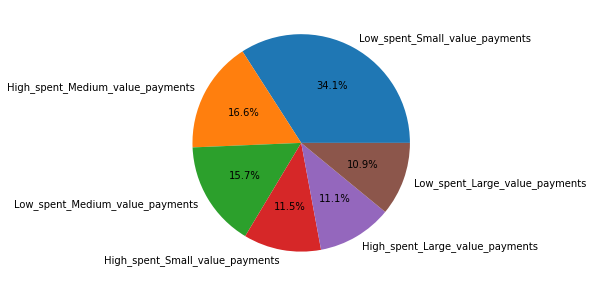

In [268]:
plt.figure(figsize=(16,5))
#pie chart for poor credit score
plt.subplot(1,2,1)
label = poor.Payment_Behaviour.value_counts().index
label_count = poor.Payment_Behaviour.value_counts().values
plt.pie(data=poor, x=label_count, labels=label, autopct='%1.1f%%', radius=1)

From the above figures it can be interpreted that Payment Behaviour does not affect credit score.

22. Monthly Balance

In [275]:
print('Good : ',good.Monthly_Balance.median())
print("*"*10)
print('Standard : ',std.Monthly_Balance.median())
print("*"*10)
print('Poor : ',poor.Monthly_Balance.median())

Good :  400.8697319478582
**********
Standard :  343.8525117701564
**********
Poor :  299.42797548559395


In [276]:
print('Good : ',good.Monthly_Balance.mean())
print("*"*10)
print('Standard : ',std.Monthly_Balance.mean())
print("*"*10)
print('Poor : ',poor.Monthly_Balance.mean())

Good :  -1.8960940462646946e+22
**********
Standard :  -4.438610841624024e+22
**********
Poor :  -1.1634265237978895e+22


(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.865e+04]),
 array([-3.33333333e+26, -2.77777778e+26, -2.22222222e+26, -1.66666667e+26,
        -1.11111111e+26, -5.55555556e+25,  1.60204052e+03]),
 <a list of 6 Patch objects>)

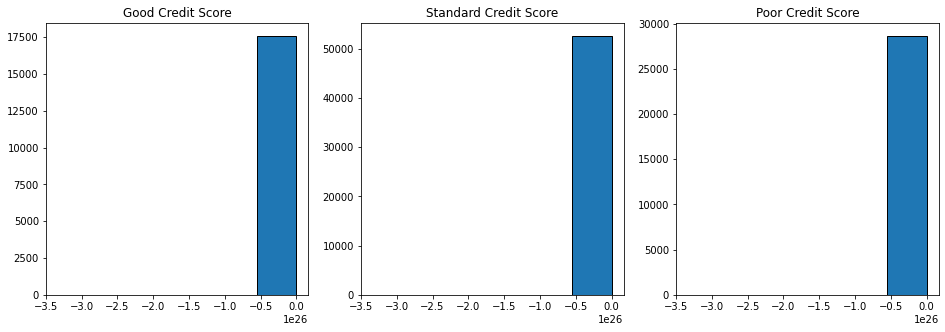

In [277]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
plt.title('Good Credit Score')
plt.hist(good.Monthly_Balance , bins = 6,edgecolor ='black') 
plt.subplot(1,3,2)
plt.title('Standard Credit Score')
plt.hist(std.Monthly_Balance , bins = 6,edgecolor ='black')
plt.subplot(1,3,3)
plt.title('Poor Credit Score')
plt.hist(poor.Monthly_Balance , bins = 6,edgecolor ='black')

Dealing with Missing Data

In [335]:
#Removing unwanted columns
def drop_unimportant_features(DataFrame):
  Feature_list=['ID', 'Customer_ID', 'SSN', 'Name']
  DataFrame.drop(Feature_list, axis=1, inplace=True)
drop_unimportant_features(dataset)

In [352]:
#Handle null values by replacig them with the median value
dataset['Age']=dataset['Age'].fillna(dataset['Age'].median())

dataset['Changed_Credit_Limit']=dataset['Changed_Credit_Limit'].fillna(dataset['Changed_Credit_Limit'].median())

dataset['Monthly_Inhand_Salary']=dataset['Monthly_Inhand_Salary'].fillna(dataset['Monthly_Inhand_Salary'].median())

dataset['Num_of_Delayed_Payment']=dataset['Num_of_Delayed_Payment'].fillna(dataset['Num_of_Delayed_Payment'].median())

dataset['Num_Credit_Inquiries']=dataset['Num_Credit_Inquiries'].fillna(dataset['Num_Credit_Inquiries'].median())

dataset['Amount_invested_monthly']=dataset['Amount_invested_monthly'].fillna(dataset['Amount_invested_monthly'].median())

dataset['Monthly_Balance']=dataset['Monthly_Balance'].fillna(dataset['Monthly_Balance'].median())

#Handle null values by replacig them with the mode value
dataset['Type_of_Loan'] = dataset['Type_of_Loan'].fillna(dataset['Type_of_Loan'].mode()[0])

dataset['Occupation'] = dataset['Occupation'].fillna(dataset['Occupation'].mode()[0])

dataset['Credit_Mix'] = dataset['Credit_Mix'].fillna(dataset['Credit_Mix'].mode()[0])

dataset['Payment_Behaviour'] = dataset['Payment_Behaviour'].fillna(dataset['Payment_Behaviour'].mode()[0])

In [337]:
#The Credit_History_Age feature has values like '22 Years and 9 Months'.
# We will try to convert this value into 22.75 (the unit will be years)

#Split the feature into two based on ' and '
dataset[['Credit_Hist_yr', 'Credit_Hist_mnt']]=dataset['Credit_History_Age'].str.split(pat=' and ', expand=True)

# Typecast to float
dataset['Credit_Hist_yr']=dataset['Credit_Hist_yr'].str.rstrip(' Years').astype('float')
dataset['Credit_Hist_mnt']=dataset['Credit_Hist_mnt'].str.rstrip(' Months').astype('float')

#Add the two features - unit is years
dataset['Credit_Hist_yr'] = dataset['Credit_Hist_mnt'] + (dataset['Credit_Hist_mnt']/12)

#Drop the features that are not required
dataset.drop(['Credit_History_Age','Credit_Hist_mnt'], axis=1, inplace=True)

#Handle null values by replacig them with the median value
dataset['Credit_Hist_yr']=dataset['Credit_Hist_yr'].fillna(dataset['Credit_Hist_yr'].median())

In [353]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  float64
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  int64  
 9   Type_of_Loan              100000 non-null  object 
 10  Delay_from_due_date       100000 non-null  int64  
 11  Num_of_Delayed_Payment    100000 non-null  float64
 12  Changed_Credit_Limit      100000 non-null  float64
 13  Num_Credit_Inquiries      100000 non-null  fl

In [351]:
dataset.isnull().sum() #All NULL values are removed

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
Credit_Hist_yr              0
dtype: int64

In [354]:
dataset

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_Hist_yr
0,January,23.0,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Standard,809.98,26.822620,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good,1.083333
1,February,23.0,Scientist,19114.12,3093.745000,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.944960,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good,5.416667
2,March,33.0,Scientist,19114.12,3093.745000,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,28.609352,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good,3.250000
3,April,23.0,Scientist,19114.12,3093.745000,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.377862,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good,4.333333
4,May,23.0,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,24.797347,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good,5.416667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,April,25.0,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",...,Standard,502.38,34.663572,No,35.104023,60.971333,High_spent_Large_value_payments,479.866228,Poor,6.500000
99996,May,25.0,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",...,Standard,502.38,40.565631,No,35.104023,54.185950,High_spent_Medium_value_payments,496.651610,Poor,7.583333
99997,June,25.0,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",...,Good,502.38,41.255522,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor,8.666667
99998,July,25.0,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",...,Good,502.38,33.638208,No,35.104023,251.672582,Low_spent_Large_value_payments,319.164979,Standard,9.750000
